Logan Williamson
====
Homework 13
====
####CHE 116: Numerical Methods and Statistics
Prof. Andrew White

Version 1.0 (4/24/2015)

----

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import seaborn
seaborn.set_context("talk")
seaborn.set_style("whitegrid")
import scipy.stats

Conceptual Questions (2 Points)
===

1. Is Error Propogation using partial derivatives exact or an approximation? If it is an approximation, when and why is it valid?

2. If you have a constant error in your independent variable, you almost always require weighted least-squares instead of ordinary least-squares for non-linear regression. Why?

####Answers
1. Error progogation using partial derivatives is an approximation that that valid when $\Delta{x}$ is small relative to $\frac{dy}{dx}$. This is because the smaller the step-size is ($\Delta{x}$) the more accurate the approximation will be.

2. A constant error in the independent variable requires weighted least squared because this will almost always result in variable error in the dependent variable. When there is variable error in the dependent variable, it is more accurate to weight the data points with less error more than those with more error. 

Exercises (8 Points)
====

1. If you have a measurement error of $\sigma_{\lambda} = 2.0$ and you are using the equation:

  $$ y = \lambda e^{-\lambda x}$$

  what is your uncertainty in $y$? Assume $x$ is exact.

2. What is the equation for standard error in residuals with constant uncertainty in the independent variable?

3. What is the equation for standard error in residuals with variable uncertainty in the dependent variable?

4. Give two cases of when to use weighted least-squares

####Answers

1. $$\sigma_{y} = \frac{dy}{d\lambda}\sigma{\lambda}$$
   
   $$\sigma_{y} = \frac{d}{d\lambda}\lambda e^{-\lambda x}$$
   
   $$\sigma_{y} = 2e^{-\lambda x}(1 - \lambda x)$$

2. $$S_{\epsilon}^2 = \frac{\sigma^2_{\epsilon} + \frac{1}{N} \sum_i^N \beta\sigma_{x_i}^2}{N}$$

3. $$S_{\epsilon}^2 = \frac{\sigma^2_{\epsilon} + \frac{1}{N} \sum_i^N \sigma_{y_i}^2}{N}$$

4. You should used weighted least squared when you have variable uncertainty in the dependent variable as well as when you have variable uncertainty in the independent and dependent variables. An example is when you're plotting a regression for concentration vs time and there is a constant error in the time measurement, resulitng in a variable error in the concentration measurement. 

Arrhenius Equation Problem (20 Points)
====

The Arrhenius Equation allows you to find a reaction rate at a temperature. It is:

$$ k = A e^{-\frac{E_a}{RT}} $$

where $k$ is the reaction rate, $A$ is an empirical constant, $E_a$ is the activation energy, $R$ is the Universal gas constant and $T$ is temperature. In this homework problem, you will determine $A$ and $E_a$ and their confidence intervals. 

The chemical reaction that you're observing is the unimolecular dissolution of a 125 Dalton compound in water. This reaction occurs over the course of days inside a large tank which has a controlled temperature. You take an approximately 250mL sample every four hours from the tank and can compute a concentration of the compound by drying the water off and weighing the dry mass. The measurement process takes about 10 minutes and so you may estimate your measurement error in time as 5 minutes, since the reaction continues during the drying process and taking the sample requires some time. Your volume measurements have a measurement error of 0.25 mL and your balance has a measurement error of 0.5 g. You know the temperature exactly.

Knowing the information above, you may fit your concentration data vs time to an exponential decay:

$$C(t) = C_0 e^{-kt}$$

and thus compute a reaction rate. Using reaction rates at four temperatures, you may estimate the activation energy and pre-exponential empricial factor $A$ from the Arrhenius equation. Carefully propogate error at all steps and ensure your final confidence interval includes error from the measurements and the regression. Report the reaction rate in mol / s$\cdot$L and activation energy in kJ. Also, plot concentration vs time for one experiment with error bars on the data and your best fit line. Also plot the best-fit Arrhenius equation and your data with error bars. As a hint, here's the basic workflow of this problem:

1. Compute concentration and error in concentration at each temperature
2. Fit the exponential equation above to the concentration vs time for each temperature to get a rate
3. Compute the error in that rate for each tempeture 
4. Put the rates and temperatures onto one plot 
5. Fit the Arrhenius equation to that plot
6. Compute the error in the Arrhenius plot terms

*Hints: you'll need to use `basinhopping` to do the minimization. Also, you should have variable measurement error for concentration due to error propogation.*

$T = 25^\circ$C
---
* volume in mL
* mass in g
* time in minutes


In [2]:
volume_25 = np.array([276.1, 240.5,  277.6,  260.3,  296.0,  237.1,  247.5,  263.2,  232.2,  264.1,  236.0,  262.2,  293.4,  268.6,  222.7,  280.5,  239.3,  267.6,  242.6,  225.5,  278.0])
mass_25 = np.array([ 13.8,  10.1,   12.8,   12.3,   12.8,    9.7,    9.2,   10.3,    8.2,    8.1,    7.8,    8.1,    8.4,    7.6,    5.3,    7.4,    5.2,    5.4,    5.2,    4.2,    4.9])
time = np.array([0, 480,  960,  1440,  1920,  2400,  2880,  3360,  3840,  4320,  4800,  5280,  5760,  6240,  6720,  7200,  7680,  8160,  8640,  9120,  9600])

In [3]:
MW = 125.
conc_25 = (mass_25*1000) / (MW * volume_25)
print conc_25

[ 0.39985512  0.33596674  0.36887608  0.37802536  0.34594595  0.32728806
  0.29737374  0.31306991  0.28251507  0.24536161  0.26440678  0.24713959
  0.22903885  0.2263589   0.19039066  0.21105169  0.17384037  0.16143498
  0.17147568  0.14900222  0.14100719]


In [4]:
MW = 125.
sigma_V = 0.25
sigma_m = 0.5
sigma_conc_25 =np.sqrt(((1 / (MW*volume_25))*sigma_m)**2 + (mass_25 / (MW * volume_25**2)*sigma_V)**2)*1000
print sigma_conc_25

[ 0.01449203  0.01663568  0.01441305  0.01537117  0.01351667  0.01687405
  0.01616441  0.01520048  0.01722921  0.01514756  0.01695147  0.01525735
  0.01363466  0.01489352  0.01796265  0.01426149  0.01671641  0.01494844
  0.01648899  0.01773913  0.01438905]


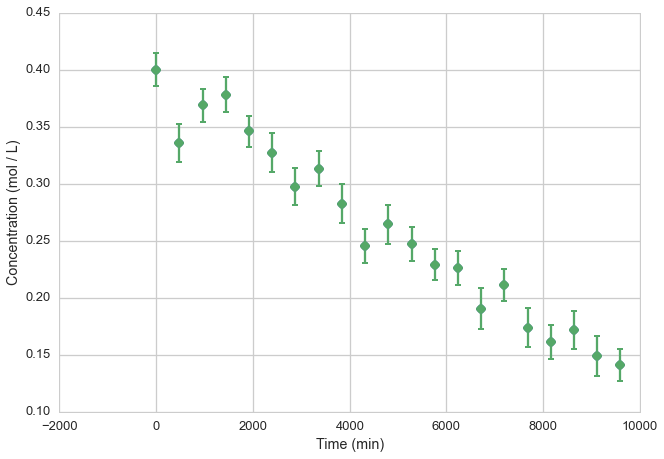

In [5]:
plt.plot(time,conc_25,'o')
plt.errorbar(time,conc_25,yerr= sigma_conc_25,xerr=5,fmt = 'o', capthick = 2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol / L)')
plt.show()

In [6]:
sigma_time = 5
def WSSR(k, time, conc, sigma_time, sigma_conc):
    w = 1. / (sigma_conc **2 + (conc_25[0]*k*np.exp(-k*time))**2 * sigma_time**2)
    yhat = conc_25[0] * np.exp(-k*time)
    ssr = np.sum(w * (conc_25 - yhat)**2)
    return ssr
bounds = {'bounds': [(0.0000000000000000001, 50.)]}
result = scipy.optimize.basinhopping(lambda s: WSSR(s[0],time,conc_25,sigma_time,sigma_conc_25), x0 = 1., minimizer_kwargs = bounds, niter = 1000)
k_25 = result.x
print result

                  nfev: 26046
 minimization_failures: 1
                   fun: 24.771794867607305
                     x: array([  9.80704730e-05])
               message: ['requested number of basinhopping iterations completed successfully']
                   nit: 1000


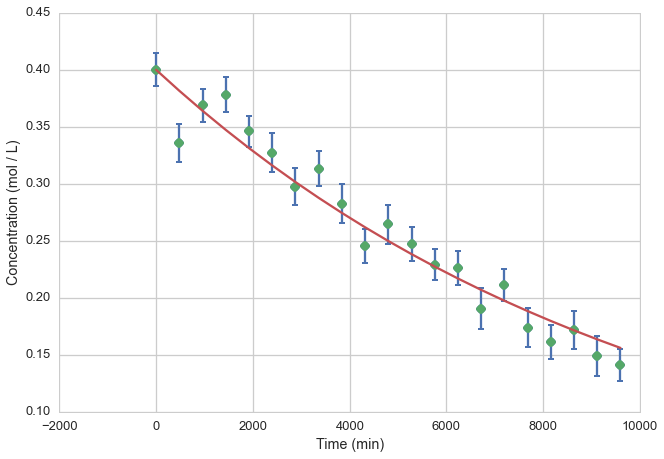

In [7]:
plt.errorbar(time,conc_25,yerr=sigma_conc_25, xerr=5,fmt ='o', capthick = 2)
plt.plot(time,conc_25, 'o')
plt.plot(time,conc_25[0] * np.exp(-k_25*time))
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol / L)')
plt.show()

In [8]:
sigma_time = 5
N = len(time) 
yhat = conc_25[0] * np.exp(-k_25*time)

s2_e = (np.sum((yhat - conc_25)**2) + np.sum(conc_25[0]**2*k_25**2 * np.exp(-2*k_25*time) * sigma_time **2) + np.sum(sigma_conc_25**2))/N
print s2_e

0.000541796977397


In [9]:
F_mat = np.row_stack( (-conc_25[0]*time*np.exp(-k_25*time)) )
s2_k = s2_e * np.linalg.inv(F_mat.transpose().dot(F_mat))
print 'sigma_k_25 =', np.sqrt(s2_k)

sigma_k_25 = [[  4.49014101e-06]]


$T = 30^\circ$C
---
* volume in mL
* mass in g
* time - same as above

In [10]:
volume_30 = np.array([243.7, 262.7,  247.4,  224.4,  225.0,  298.5,  233.0,  285.7,  227.5,  243.3,  240.3,  276.1,  276.4,  228.0,  245.2,  236.0,  261.1,  243.3,  275.9,  239.5,  208.0])
mass_30 = np.array([ 12.1,  12.4,    9.0,    8.5,    7.3,    8.3,    4.8,    5.3,    3.3,    3.6,    2.6,    2.6,    2.4,    1.5,    2.4,    1.2,    2.3,    2.0,    2.2,    0.9,    0.4])

In [11]:
MW = 125.
conc_30 = (mass_30*1000) / (MW * volume_30)
print conc_30

[ 0.39720968  0.37761705  0.29102668  0.3030303   0.25955556  0.22244556
  0.16480687  0.14840742  0.11604396  0.11837238  0.08655847  0.07533502
  0.06946454  0.05263158  0.07830343  0.04067797  0.07047108  0.06576243
  0.06379123  0.03006263  0.01538462]


In [12]:
sigma_V = 0.25
sigma_m = 0.5
sigma_conc_30 =np.sqrt(((1 / (MW*volume_30))*sigma_m)**2 + (mass_30 / (MW * volume_30**2)*sigma_V)**2)*1000
print sigma_conc_30

[ 0.01641868  0.01523073  0.01617082  0.01782851  0.01778012  0.01340163
  0.01716829  0.0140013   0.01758288  0.01644106  0.0166461   0.01448767
  0.01447192  0.01754395  0.01631341  0.01694921  0.01531995  0.01644075
  0.01449812  0.01670149  0.01923078]


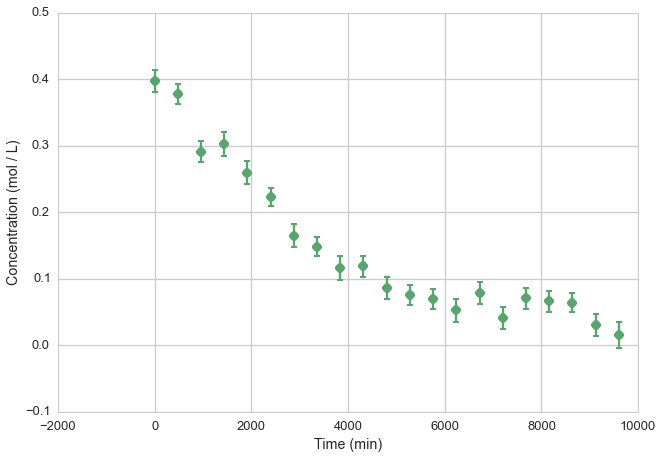

In [13]:
plt.plot(time,conc_30,'o')
plt.errorbar(time,conc_30,yerr=sigma_conc_30,xerr=5, fmt = 'o', capthick = 2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol / L)')
plt.show()

In [14]:
time_err = 5
def WSSR(k, time, conc, sigma_time, sigma_conc):
    sigma_time = 5
    w = 1. / (sigma_conc **2 + (conc_30[0]*k*np.exp(-k*time))**2 * sigma_time**2)
    yhat = conc_30[0] * np.exp(-k*time)
    ssr = np.sum(w * (conc_30 - yhat)**2)
    return ssr
bounds = {'bounds': [(0.000000000000001, 50)]}
result = scipy.optimize.basinhopping(lambda s: WSSR(s[0],time,conc_30,time_err,sigma_conc_30), x0 = 1, minimizer_kwargs = bounds,niter = 1000)
k_30 = result.x
print result

                  nfev: 74406
 minimization_failures: 1
                   fun: 29.438338562387425
                     x: array([ 0.00027464])
               message: ['requested number of basinhopping iterations completed successfully']
                   nit: 1000


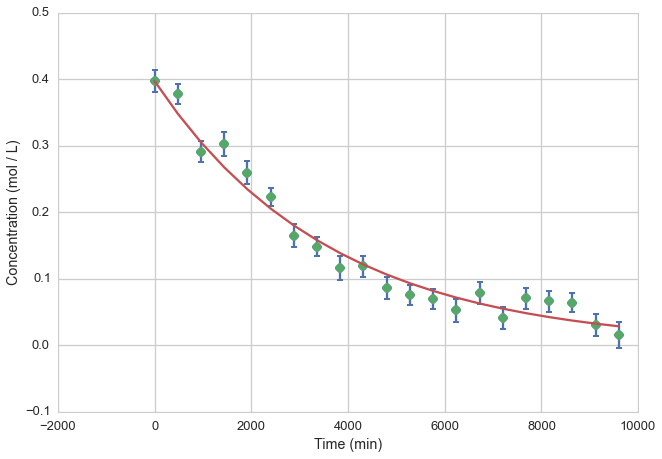

In [15]:
plt.errorbar(time,conc_30,yerr=sigma_conc_30,xerr=5,fmt ='o', capthick = 2)
plt.plot(time,conc_30, 'o')
plt.plot(time,conc_30[0] * np.exp(-k_30*time))
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol / L)')
plt.show()

In [20]:
sigma_time = 5
N = len(time) 
yhat = conc_30[0] * np.exp(-k_30*time)
s2_e = (np.sum((yhat - conc_30)**2) + np.sum(conc_30[0]**2*k_30**2 * np.exp(-2*k_30*time) * sigma_time **2) + np.sum(sigma_conc_30**2))/N

print s2_e

0.000631204317054


In [21]:
F_mat = np.row_stack( (-conc_30[0]*time*np.exp(-k_30*time)) )
s2_k = s2_e * np.linalg.inv(F_mat.transpose().dot(F_mat))
print 'sigma_k_30 =',np.sqrt(s2_k), 'mol/ s*L'

sigma_k_30 = [[  1.32548022e-05]] mol/ s*L


$T = -10^\circ$C
---
* volume in mL
* mass in g
* time - same as above

In [22]:
volume_minus_10 = np.array([254.1, 280.5,  265.7,  233.8,  258.8,  239.6,  279.0,  194.8,  285.9,  278.6,  281.0,  302.7,  265.3,  209.9,  278.0,  213.2,  243.3,  274.4,  238.9,  259.3,  251.6])
mass_minus_10 = np.array([ 12.8,  13.6,   12.5,   11.4,   13.4,   12.5,   12.7,   10.2,   14.0,   13.7,   13.1,   14.2,   12.8,    9.2,   13.0,    8.9,   11.7,   12.8,   10.6,   12.2,   11.1])

In [23]:
MW = 125.
conc_minus_10 = (mass_minus_10*1000) / (MW * volume_minus_10)
print conc_minus_10

[ 0.40299095  0.38787879  0.37636432  0.39007699  0.41421947  0.41736227
  0.36415771  0.41889117  0.39174537  0.39339555  0.37295374  0.37528907
  0.38597814  0.35064316  0.37410072  0.33395872  0.38471023  0.37317784
  0.35496023  0.37639799  0.35294118]


In [24]:
sigma_V = 0.25
sigma_m = 0.5
sigma_conc_minus_10 =np.sqrt(((1 / (MW*volume_minus_10))*sigma_m)**2 + (mass_minus_10 / (MW * volume_minus_10**2)*sigma_V)**2)*1000
print sigma_conc_minus_10

[ 0.01574683  0.01426444  0.01505874  0.01711372  0.01546113  0.01670017
  0.01434063  0.02054092  0.0139951   0.01436184  0.01423874  0.01321804
  0.01508166  0.01906127  0.01439242  0.01876581  0.01644536  0.01458122
  0.01674753  0.01543042  0.01590212]


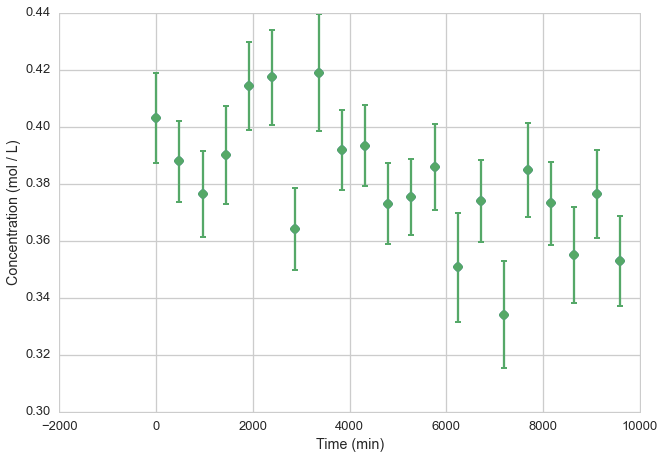

In [25]:
plt.plot(time,conc_minus_10,'o')
plt.errorbar(time,conc_minus_10,yerr=sigma_conc_minus_10,xerr=5, fmt = 'o', capthick = 2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol / L)')
plt.show()

In [26]:
time_err = 5
def WSSR(k, time, conc, sigma_time, sigma_conc):
    sigma_time = 5
    w = 1. / (sigma_conc **2 + (conc_minus_10[0]*k*np.exp(-k*time))**2 * sigma_time**2)
    yhat = conc_minus_10[0] * np.exp(-k*time)
    ssr = np.sum(w * (conc_minus_10 - yhat)**2)
    return ssr
bounds = {'bounds': [(0.0000000000000001, 50)]}
result = scipy.optimize.basinhopping(lambda s: WSSR(s[0],time,conc_minus_10,time_err,sigma_conc_minus_10), x0 = 1, minimizer_kwargs = bounds,niter = 1000)
k_minus_10 = result.x
print result

                  nfev: 13298
 minimization_failures: 1
                   fun: 22.075530431908014
                     x: array([  1.16881213e-05])
               message: ['requested number of basinhopping iterations completed successfully']
                   nit: 1000


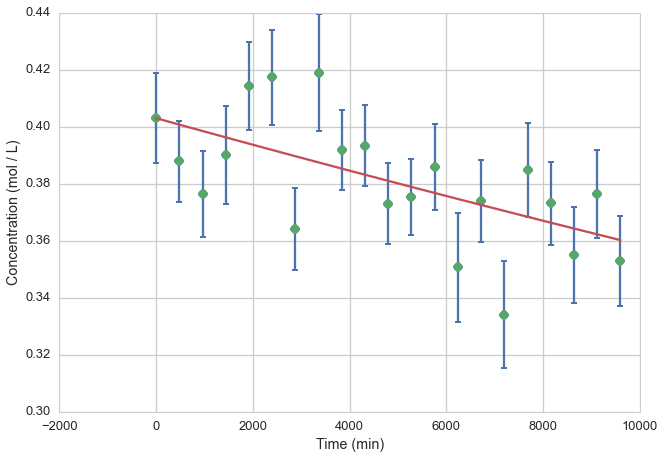

In [27]:
plt.errorbar(time,conc_minus_10,yerr=sigma_conc_minus_10,xerr=5,fmt ='o', capthick = 2)
plt.plot(time,conc_minus_10, 'o')
plt.plot(time,conc_minus_10[0] * np.exp(-k_minus_10*time))
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol / L)')
plt.show()

In [29]:
sigma_time = 5
N = len(time) 
yhat = conc_minus_10[0] * np.exp(-k_minus_10*time)

s2_e = (np.sum((yhat - conc_minus_10)**2) + np.sum(conc_minus_10[0]**2*k_minus_10**2 * np.exp(-2*k_minus_10*time) * sigma_time **2) + np.sum(sigma_conc_minus_10**2))/N
print s2_e

0.000550628122144


In [30]:
F_mat = np.row_stack( (-conc_minus_10[0]*time*np.exp(-k_minus_10*time)) )
s2_k = s2_e * np.linalg.inv(F_mat.transpose().dot(F_mat))
print 'sigma_k_minus_10 =',np.sqrt(s2_k),'mol/s*L'

sigma_k_minus_10 = [[  2.46702587e-06]] mol/s*L


$T = 8^\circ$C
---
* volume in mL
* mass in g
* time - same as above


In [32]:
volume_8 = np.array([249.3, 251.0,  202.6,  291.9,  251.6,  214.1,  272.5,  257.8,  274.7,  261.7,  227.6,  260.9,  295.4,  277.4,  237.2,  260.8,  243.0,  249.6,  258.0,  260.6,  272.4])
mass_8 = np.array([ 12.8,  12.3,    9.6,   14.2,   11.8,   10.1,   12.0,   11.0,   11.4,   11.1,    9.2,   11.0,   11.4,   11.2,    9.6,   10.1,   10.2,    9.2,    9.2,    8.8,   10.5])

In [33]:
MW = 125.
conc_8 = (mass_8*1000) / (MW * volume_8)
print conc_8

[ 0.4107501   0.39203187  0.37907206  0.38917437  0.37519873  0.37739374
  0.35229358  0.34134988  0.33199854  0.33931983  0.32337434  0.33729398
  0.30873392  0.32299928  0.3237774   0.30981595  0.33580247  0.29487179
  0.28527132  0.27014582  0.30837004]


In [34]:
sigma_V = 0.25
sigma_m = 0.5
sigma_conc_8 =np.sqrt(((1 / (MW*volume_8))*sigma_m)**2 + (mass_8 / (MW * volume_8**2)*sigma_V)**2)*1000
print sigma_conc_8

[ 0.01605021  0.01594104  0.01974888  0.01370738  0.01590262  0.01868805
  0.01468246  0.01551943  0.01456447  0.01528811  0.01757828  0.01533495
  0.01354348  0.01442255  0.01686686  0.0153403   0.01646453  0.01602836
  0.01550634  0.01535138  0.01468701]


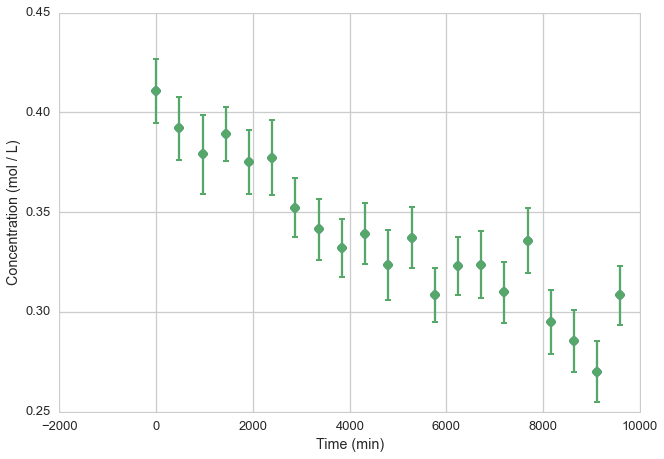

In [35]:
plt.plot(time,conc_8,'o')
plt.errorbar(time,conc_8,yerr=sigma_conc_8,xerr=5, fmt = 'o', capthick = 2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol / L)')
plt.show()

In [36]:
time_err = 5
def WSSR(k, time, conc, sigma_time, sigma_conc):
    sigma_time = 5
    w = 1. / (sigma_conc **2 + (conc_8[0]*k*np.exp(-k*time))**2 * sigma_time**2)
    yhat = conc_8[0] * np.exp(-k*time)
    ssr = np.sum(w * (conc_8 - yhat)**2)
    return ssr
bounds = {'bounds': [(0.0000000000000001, 50)]}
result = scipy.optimize.basinhopping(lambda s: WSSR(s[0],time,conc_8,time_err,sigma_conc_8), x0 = 1, minimizer_kwargs = bounds,niter = 1000)
k_8 = result.x
print result

                  nfev: 29040
 minimization_failures: 6
                   fun: 17.613226015063489
                     x: array([  4.01874826e-05])
               message: ['requested number of basinhopping iterations completed successfully']
                   nit: 1000


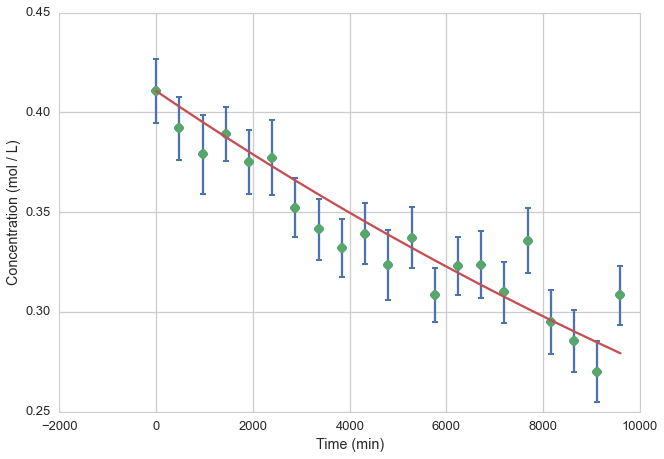

In [37]:
plt.errorbar(time,conc_8,yerr=sigma_conc_8,xerr=5,fmt ='o', capthick = 2)
plt.plot(time,conc_8, 'o')
plt.plot(time,conc_8[0] * np.exp(-k_8*time))
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol / L)')
plt.show()

In [38]:
sigma_time = 5
N = len(time) 
yhat = conc_8[0] * np.exp(-k_8*time)

s2_e = (np.sum((yhat - conc_8)**2) + np.sum(conc_8[0]**2*k_8**2 * np.exp(-2*k_8*time) * sigma_time **2) + np.sum(sigma_conc_8**2))/N
print s2_e

0.000454614990339


In [39]:
F_mat = np.row_stack( (-conc_8[0]*time*np.exp(-k_8*time)) )
s2_k = s2_e * np.linalg.inv(F_mat.transpose().dot(F_mat))
print 'sigma_k_8 =',np.sqrt(s2_k),'mol/s*L'

sigma_k_8 = [[  2.69862201e-06]] mol/s*L


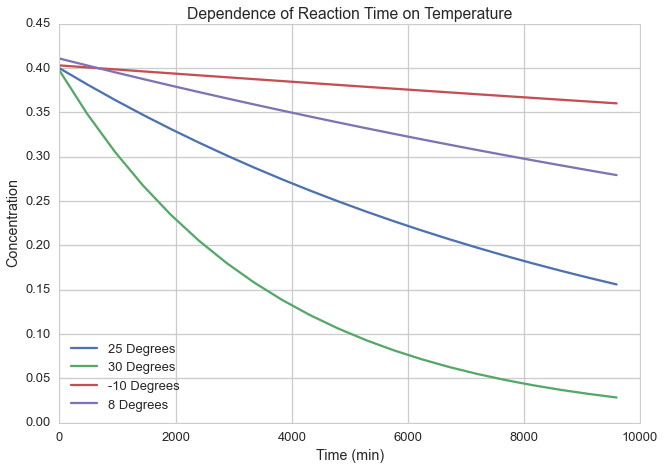

In [46]:
plt.plot(time,conc_25[0] * np.exp(-k_25*time),label ='25 Degrees')
plt.plot(time,conc_30[0] * np.exp(-k_30*time),label = '30 Degrees')
plt.plot(time,conc_minus_10[0] * np.exp(-k_minus_10*time),label = '-10 Degrees')
plt.plot(time,conc_8[0] * np.exp(-k_8*time), label = '8 Degrees')
plt.legend(loc ='lower left')
plt.title('Dependence of Reaction Time on Temperature')
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.show()

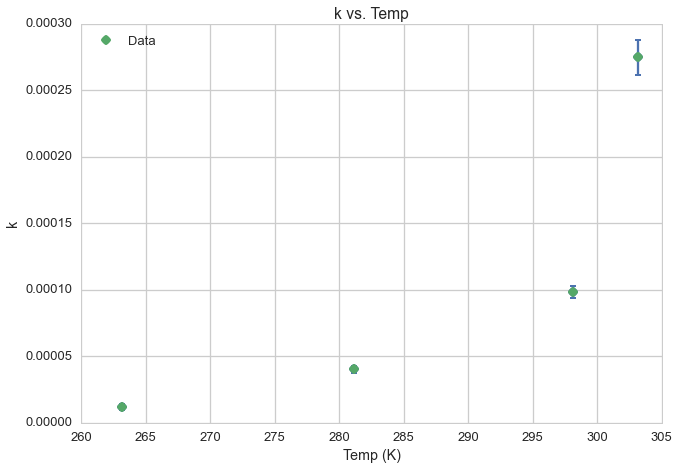

In [47]:
temp = np.array([263.15,281.15,298.15,303.15])
k = np.array([k_minus_10,k_8,k_25,k_30])
sigma_k = np.array([0.00000247,0.00000270,0.00000449,0.0000133])
plt.errorbar(temp,k,yerr=sigma_k,fmt='o',capthick = 2)
plt.plot(temp,k,'o', label = 'Data')
plt.title('k vs. Temp')
plt.xlabel('Temp (K)')
plt.ylabel('k')
plt.legend(loc = 'upper left')
plt.xlim([260,305])
plt.show()

In [48]:
def WSSR(Ea, A, temp, k, sigma_k):
    w = 1. / sigma_k**2
    k_hat = A * np.exp(-Ea / (0.0083145*temp))
    ssr = np.sum(w*(k - k_hat)**2)
    return ssr


result = scipy.optimize.minimize(lambda s: WSSR(s[0],s[1],temp,k,sigma_k), x0 = [50.,3000.],method = 'COBYLA')

print result
Ea_hat = result.x[0]
A_hat = result.x[1]

  status: 1
    nfev: 51
   maxcv: 0.0
 success: True
     fun: 22100.79259132655
       x: array([   41.35028218,  3001.14835352])
 message: 'Optimization terminated successfully.'


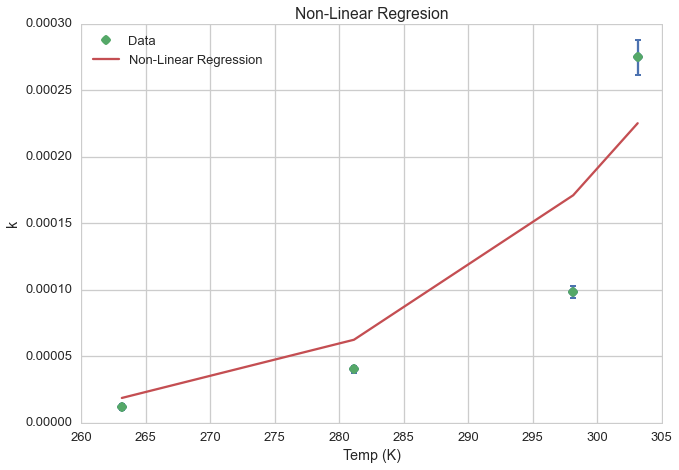

In [49]:
plt.errorbar(temp,k,yerr=sigma_k,fmt='o',capthick = 2)
plt.plot(temp,k,'o', label = 'Data')
plt.plot(temp, A_hat*np.exp(-Ea_hat / (0.0083145 * temp)), label = 'Non-Linear Regression')
plt.title('Non-Linear Regresion')
plt.xlabel('Temp (K)')
plt.ylabel('k')
plt.legend(loc = 'upper left')
plt.xlim([260,305])
plt.show()

In [50]:
N = 4

k_hat = A_hat * np.exp(-Ea_hat / (0.0083145 * temp))
s2_e = ((np.var(k - k_hat, ddof=1)**2) + (np.sum(sigma_k**2) / N)) / N

print s2_e

1.31526471297e-11


In [51]:
F_mat_1 = np.row_stack( ((-A_hat*np.exp(-Ea_hat/(0.0083145 * temp))) / (0.0083145 * temp)) )
F_mat_2 = np.row_stack((np.exp(-Ea_hat / (0.0083145 * temp))))
F_mat_total = np.column_stack( (F_mat_1, F_mat_2) )
s2_beta = s2_e * np.linalg.inv(F_mat_total.transpose().dot(F_mat_total))
sigma_Ea = np.sqrt(s2_beta[0,0])
sigma_A = np.sqrt(s2_beta[1,1])
print sigma_Ea
print sigma_A

1.62835594169
1958.7223186


In [52]:
print scipy.stats.t.ppf(0.975, 4) * sigma_Ea

4.52104088382


In [54]:
print scipy.stats.t.ppf(0.975, 4) * sigma_A

5438.28499393


**Activation Energy = $41.4 \pm{4.52} kJ$**

**A = $3001 \pm{5438}$**